# Linear Regression

---

Linear Regression in its simplest form, fits a linear model to the data set by adjusting a set of parameters to make the sum of the squared residuals of the model as small as possible.

It is a supervised learning algorithm that is applied to real valued target functions to predict a range of possible outputs for any given input. The linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (or the *intercept*). 

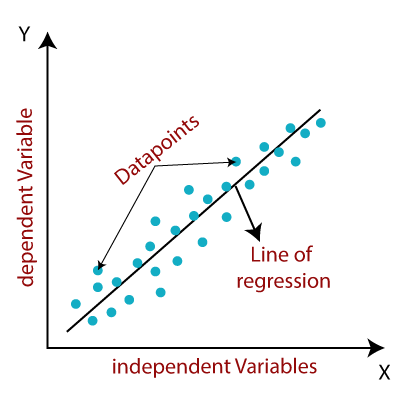

---

The vectorized form of the Linear Regression model prediction is below:

$\hat{y} = h_{\theta}(x) = \theta\ \cdot x $

In this equation:
- $\theta$ is the model's *parameter vector* that contains the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$.
- **x** is the instance's *feature vector*, containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal to 1
- $\theta \cdot$ **x** is the dot product of the vectors **$\theta$** and **x**
- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$

---

## Training the Model

---

We will use the Mean Squared Error (MSE) as our cost function for this model. Therefore, to train our model, we need to find the value of $\theta$ that minimizes the MSE.

The equation for MSE is seen below:

MSE$(X,h_{\theta}) = \frac{1}{m} \sum_{i = 1}^{m} (\theta^{T}x^{(i)} - y^{(i)})^{2}$


## Implementing Linear Regression

For the purposes of this example, we will be using scikit-learn's built-in ```LinearRegression``` module. We are going to implement on a dataset containing Rocket Propellant Age (days) and Shear Strength (psi).

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
rockets = pd.read_csv('rocket_propellant.csv')

### Data Exploration

In [4]:
rockets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Shear Strength, yi (psi)         20 non-null float64
Age of Propellant, xi (weeks)    20 non-null float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [5]:
rockets.head(10)

,"Shear Strength, yi (psi)","Age of Propellant, xi (weeks)"
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50
5,1708.30,19.00
6,1784.70,24.00
7,2575.00,2.50
8,2357.90,7.50
9,2256.70,11.00


---

This is a low-dimensionality dataset which will work perfectly for our simple Linear Regression model. We'll use this model to predict the shear strength of rockets based on the age of their propellant. First, let's plot our data.

---

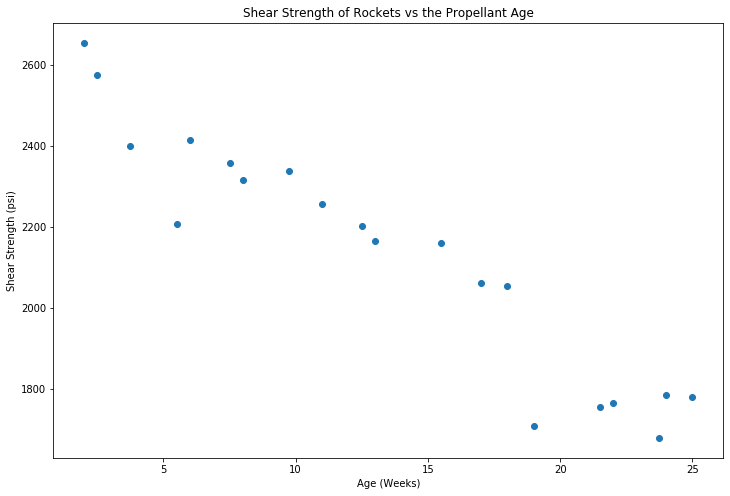

In [6]:
strength = rockets['Shear Strength, yi (psi)']
age = rockets['Age of Propellant, xi (weeks)']

plt.figure(figsize = (12, 8))
plt.scatter(age, strength)
plt.title('Shear Strength of Rockets vs the Propellant Age')
plt.xlabel("Age (Weeks)")
plt.ylabel("Shear Strength (psi)")
plt.show()

---

From the plot above we can see an obvious linear relationship between propellant age and the shear strength of rockets. A simple Linear Regression model will be good at predicting unseen data.

We'll next need to build the Linear Regression model for this data, but first we need to import two modules. We'll start with ```sklearn.model_selection.train_test_split``` to partion our data into training and testing subsets, documentation for which can be found at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split). We'll also import ```sklearn.linear_model.LinearRegression``` for our Linear Model, documentation for which can be found at [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

---

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = np.array(strength).reshape(-1,1)
y = np.array(age)

---

Split the data into testing and training sets.

---

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

---

Fit the LinearRegression module to the data and predict the shear strength.

---

In [10]:
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

---

We should now plot the results with our predicted LinearRegression line.

---

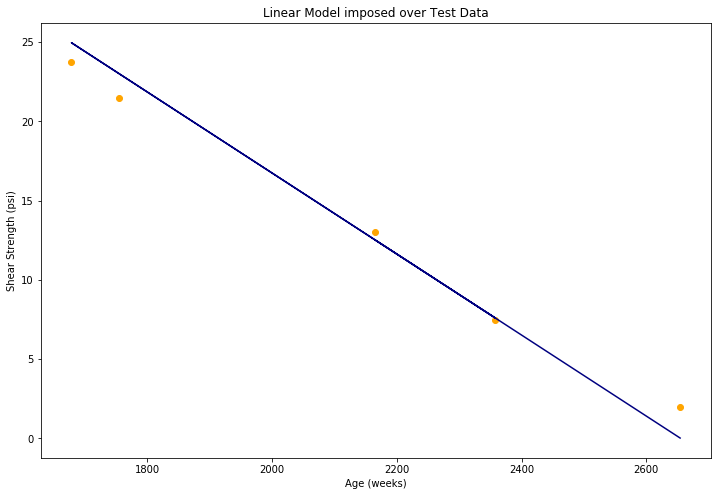

In [11]:
plt.figure(figsize = (12, 8))
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_test, prediction, color = 'navy')
plt.title("Linear Model imposed over Test Data")
plt.xlabel("Age (weeks)")
plt.ylabel("Shear Strength (psi)")
plt.show()

--- 

---

From our plot above we can see where our Linear Regression line fits in the test data and that there is an obvious negative correlation.

Let's next see how accurate our model is by checking the coefficient of determination of our prediction, or the R$^{2}$

---

In [12]:
r_squared = reg.score(X, y)
print(f"R^2 score = {np.round(r_squared * 100, 2)}%")

R^2 score = 89.94%


---

A high R$^{2}$ shows that our model explains a majority of the variability of the 
response data round its mean.

---